# Sea Level Predictor

We will analyze a dataset of the global average sea level change since 1880.

and then will use the data to predict the sea level change through year 2050.

Use Pandas to import the data from epa-sea-level.csv .

In [1]:
#Importing our needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

#Extract the data 
df = pd.read_csv("C:/Users/Sicelo/Documents/FreeCodeCamp Projects/Sea Level Predictor/epa-sea-level.csv ")

df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


*Use matplotlib to create a scatter plot using the Year column as the xaxis
and the CSIRO Adjusted Sea Level column as the y-axis.

*Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. 

*Plot the line of best fit over the top of the scatter plot. 



slope:  0.063
intercept:  -119.066


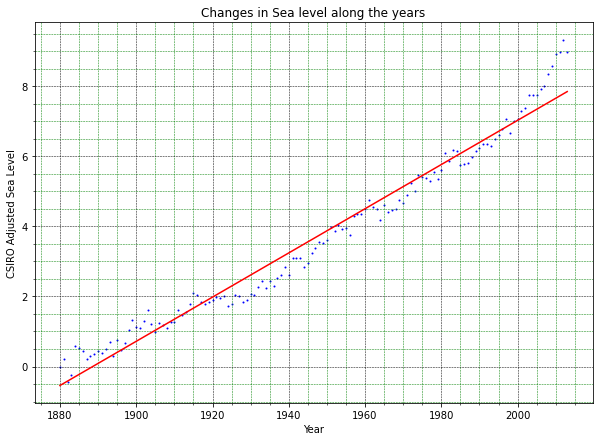

<Figure size 432x288 with 0 Axes>

In [4]:
#Plotting: Creating a scatter plot

from scipy.stats import linregress

plt.figure(figsize = (10,7))

plt.scatter( x = df['Year'], y = df['CSIRO Adjusted Sea Level'], s= 1, c = "b")

#Setting up for the line of best fit

x = df['Year']
y = df['CSIRO Adjusted Sea Level'] 

m, b, *_ = linregress(x, y)

print("slope: ", round(m,3))
print("intercept: ", round(b,3))

plt.plot(x, b + m*x, 'r')

#Attaching our axis labels
plt.title("Changes in Sea level along the years", fontsize = 12, color = "k")
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")

#Setting up the gridlines
plt.minorticks_on()

plt.grid(which = "major", linestyle = "--", color = "k", linewidth = 0.5)
plt.grid(which = "minor", linestyle = "--", color = "g", linewidth = 0.5)

plt.show()

plt.savefig("Changes_Sea_Level.png")

Make the line go through the year 2050 to predict the sea level rise in 2050.

The estimated sea Level by 2050:  10.175


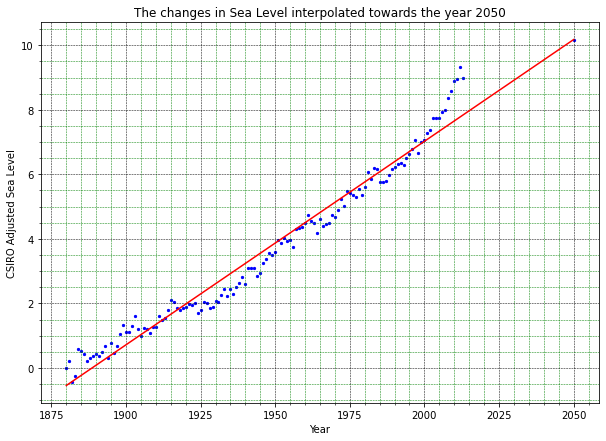

<Figure size 432x288 with 0 Axes>

In [7]:
#Lets wrangle our data first 

years = [int(year) for year in range(1880,2014)]
df_years = pd.DataFrame({'Year' : years})

sea_level = []

for value in df['CSIRO Adjusted Sea Level'].values:
    sea_level.append(value)
    
df_SeaLevel = pd.DataFrame({"CSIRO Adjusted Sea Level": sea_level})

#Now lets join thetw two particular dataframes

new_dataframe = pd.concat([df_years, df_SeaLevel], axis = 1)

#Now lets fit a line of best fit concerning the two variables

x = new_dataframe['Year']
y = new_dataframe["CSIRO Adjusted Sea Level"]

m, b, *_ = linregress(x,y)

#Now let us interpolate using our line of best fit

new_dataframe.at[134] = [2050, b + m*2050]

print("The estimated sea Level by 2050: ", round(new_dataframe.loc[134,"CSIRO Adjusted Sea Level"], 3) )

#Now lets try some plotting

x1 = new_dataframe['Year']
y1 = new_dataframe["CSIRO Adjusted Sea Level"]

m, b, *_ = linregress(x1,y1)

plt.figure(figsize = (10,7))

plt.scatter( x1 , y1,  s = 5, c = 'b')
plt.plot(x1, b + m*x1, "r")

plt.title("The changes in Sea Level interpolated towards the year 2050")
plt.ylabel("CSIRO Adjusted Sea Level")
plt.xlabel("Year")

plt.minorticks_on()

plt.grid(which = "major", linestyle = "--", color = "k", linewidth = 0.5)
plt.grid(which = "minor", linestyle = "--", color = "g", linewidth = 0.5)

plt.show()

plt.savefig("Sea_level Interpolated.png")


 Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 

Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it
has since the year 2000.

slope:  0.166
intercept:  -325.793


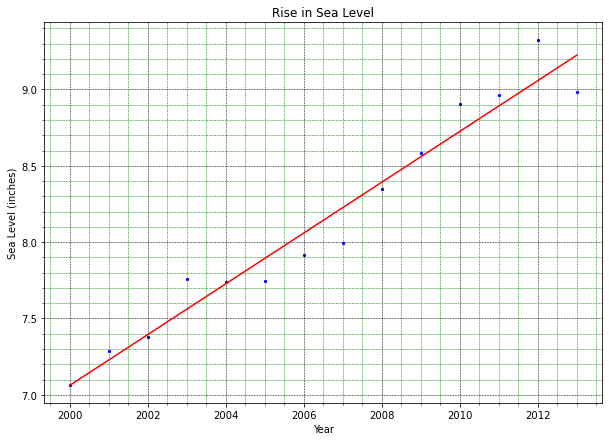

In [9]:
#For this we will have to wrangle our data first 

df_2000 = df[  df['Year' ] >= 2000]


plt.figure(figsize = (10,7))
plt.scatter( x = df_2000['Year'], y = df_2000['CSIRO Adjusted Sea Level'], s= 5, c = "b")

#Setting up for the line of best fit

x = df_2000['Year']
y = df_2000['CSIRO Adjusted Sea Level'] 

m, b, *_ = linregress(x, y)

print("slope: ", round(m,3))
print("intercept: ", round(b,3))

plt.plot(x, b + m*x, 'r')

#Attaching our axis labels
plt.title("Rise in Sea Level", fontsize = 12, color = "k")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")

#Setting up the gridlines
plt.minorticks_on()

plt.grid(which = "major", linestyle = "--", color = "k", linewidth = 0.5)
plt.grid(which = "minor", linestyle = "--", color = "g", linewidth = 0.5)

plt.show()


C:\Users\Sicelo\AppData\Local\Temp\ipykernel_5796\2670312687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000.at[134] = [2050, b + m*2050, np.nan, np.nan, np.nan]


The estimated Sea Level By the year 2050, using changes in Sea Level from the year 2000:  15.382


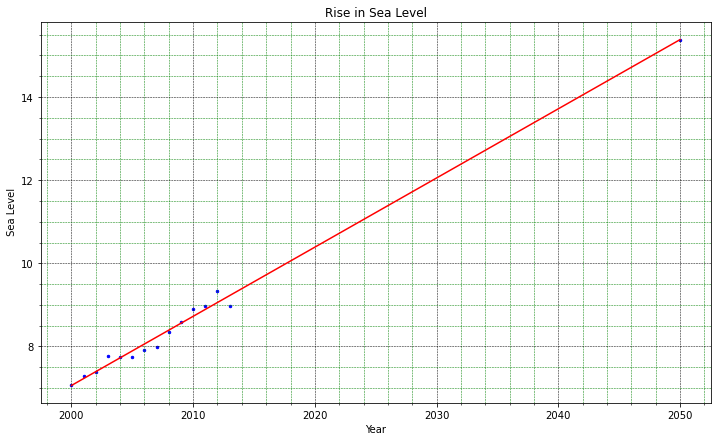

In [10]:
#Lets interpolate again using the fitted line above

df_2000.at[134] = [2050, b + m*2050, np.nan, np.nan, np.nan]

print("The estimated Sea Level By the year 2050, using changes in Sea Level from the year 2000: ", round(b+m*2050, 3))

df_2000 = df_2000[['Year', 'CSIRO Adjusted Sea Level']]


x = df_2000['Year']
y = df_2000['CSIRO Adjusted Sea Level']

plt.figure(figsize = (12,7))

plt.scatter( x, y, s = 6, c = 'b')
plt.plot(x, b + m*x, c = "r")

#Attaching labels on your diagram
plt.title("Rise in Sea Level", fontsize = 12, color = "k")
plt.xlabel("Year")
plt.ylabel(" Sea Level")

#Setting up the gridlines
plt.minorticks_on()

plt.grid(which = "major", linestyle = "--", color = "k", linewidth = 0.5)
plt.grid(which = "minor", linestyle = "--", color = "g", linewidth = 0.5)

plt.show()




Crucial skills obtained from this Project

1. Using the linregress function from the module scipy

2. Sketching a scatter plot and then fitting the line of best fit

3. Making predictions based on your line of best fit.
